In [102]:
import acquire
import prepare
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from scipy.stats import ttest_ind

In [103]:
df = acquire.get_iris_data()

In [104]:
df = prepare.prep_iris(df)

In [105]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123)

In [106]:
train_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,virginica,5.8,2.8,5.1,2.4,2
136,virginica,6.3,3.4,5.6,2.4,2
53,versicolor,5.5,2.3,4.0,1.3,1
19,setosa,5.1,3.8,1.5,0.3,0
38,setosa,4.4,3.0,1.3,0.2,0


In [107]:

cols = [col for col in train_df]
cols = cols[1:]
cols

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species_encode']

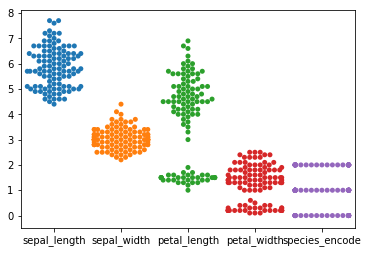

In [108]:
sns.swarmplot(data=train_df)

In [110]:
df_melt = pd.melt(train_df.drop(columns=['species_encode']) , "species", var_name="measurement")

df_melt.head()

,species,measurement,value
0,virginica,sepal_length,5.8
1,virginica,sepal_length,6.3
2,versicolor,sepal_length,5.5
3,setosa,sepal_length,5.1
4,setosa,sepal_length,4.4


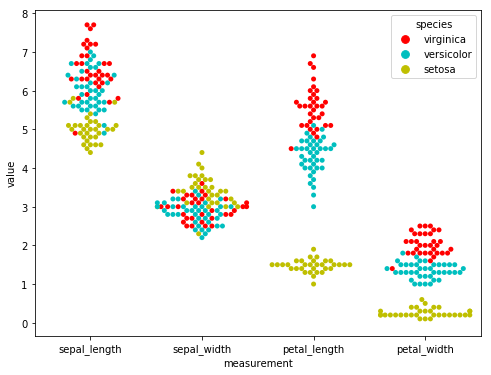

In [111]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y", "b", "p"], data=df_melt)

In [ ]:
Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width
petal_length x petal_width
sepal_area x petal_area
sepal_length x petal_length
Make your figure size 14 x 8. What are your takeaways?

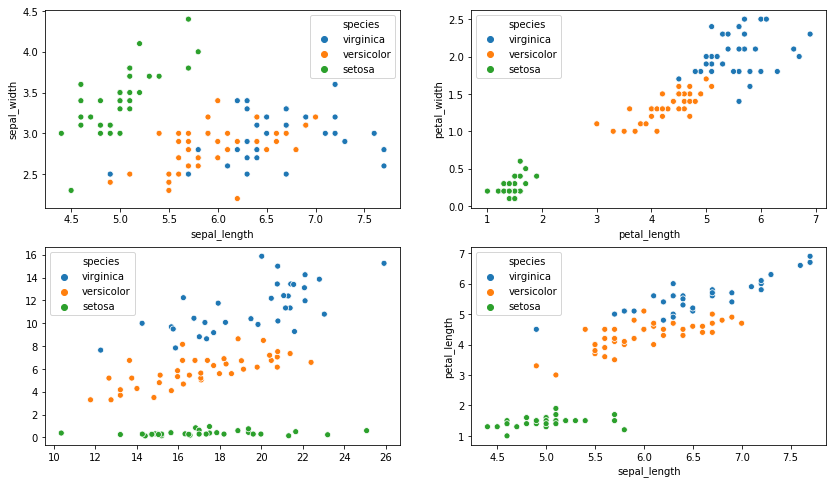

In [101]:
sepal_area = train_df.sepal_length * train_df.sepal_width
petal_area = train_df.petal_length * train_df.petal_width
tup_list = [(train_df['sepal_length'], train_df['sepal_width']), (train_df['petal_length'],train_df['petal_width']), (sepal_area, petal_area), (train_df['sepal_length'],train_df['petal_length'])]
plt.figure(figsize=(14,8))
for i, tup in enumerate(tup_list):  
    plot_number = i + 1  
    plt.subplot(2, 2, plot_number)
    sns.scatterplot(x=tup[0], y=tup[1],hue = train_df['species'])
    

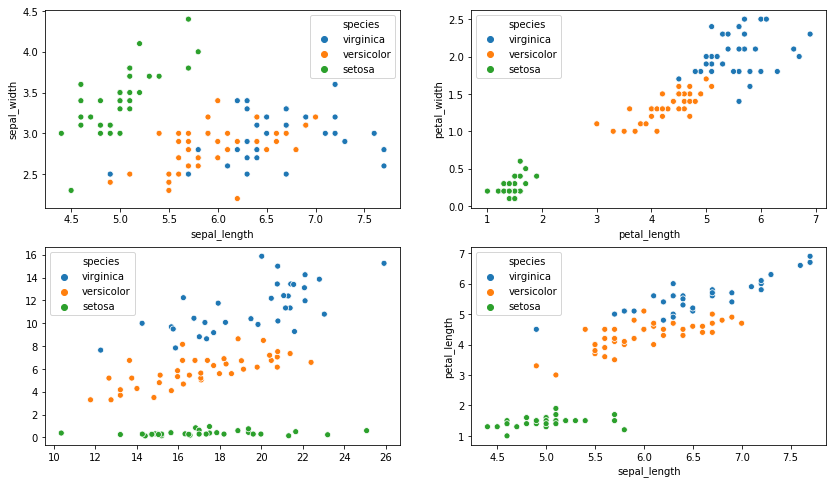

In [57]:
# sepal_length x sepal_width
# petal_length x petal_width
# sepal_area x petal_area
# sepal_length x petal_length

plt.figure(figsize=(14,8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=train_df['sepal_length'], y=train_df['sepal_width'], hue=train_df['species'])
plt.subplot(2, 2, 2)
sns.scatterplot(x=train_df['petal_length'], y=train_df['petal_width'], hue=train_df['species'])
plt.subplot(2, 2, 3)
sns.scatterplot(x=sepal_area, y=petal_area, hue=train_df['species'])
plt.subplot(2, 2, 4)
sns.scatterplot(x=train_df['sepal_length'], y=train_df['petal_length'], hue=train_df['species'])
plt.show()
# sns.regplot(x=petal_area, y=sepal_area, hue=train_df.species)

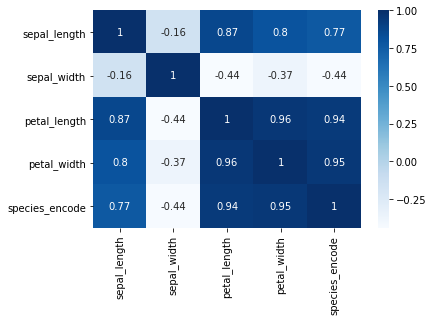

In [113]:
sns.heatmap(train_df.corr(), cmap='Blues', annot=True)

In [73]:
train_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,virginica,5.8,2.8,5.1,2.4,2
136,virginica,6.3,3.4,5.6,2.4,2
53,versicolor,5.5,2.3,4.0,1.3,1
19,setosa,5.1,3.8,1.5,0.3,0
38,setosa,4.4,3.0,1.3,0.2,0


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


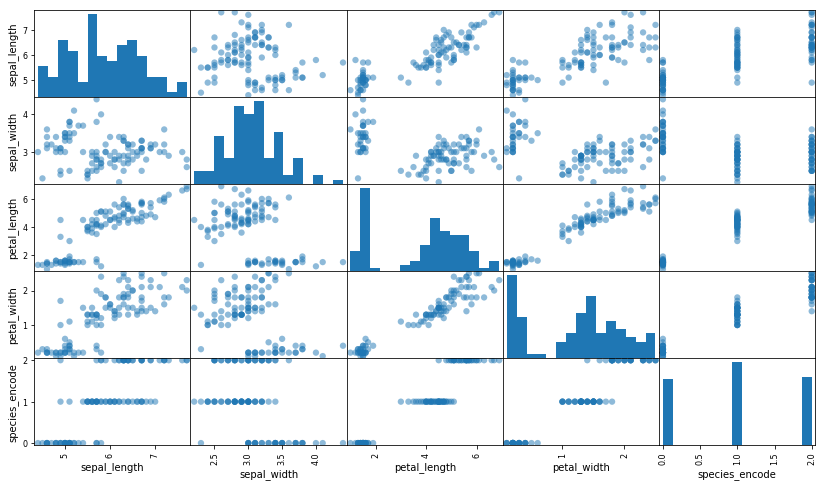

In [75]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df[cols], marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(14,8), cmap=cmap)

In [82]:
virginica = train_df[train_df.species == 'virginica']
versicolor = train_df[train_df.species == 'versicolor']
print(ttest_ind(virginica.sepal_length, versicolor.sepal_length))

Ttest_indResult(statistic=4.232219188580116, pvalue=6.811720108343317e-05)


In [83]:
# ^ small p (p < 0.05), large t (t > 1.96) significant difference of means.  Valuable feature to keep.